In [1]:
from uwnet.stochastic_parameterization.joint_pdf import (
    get_data,
    plot_df,
    get_ng,
)
from uwnet.stochastic_parameterization.residual_stochastic_state_model import StochasticStateModel
dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'

In [2]:
base_model = StochasticStateModel(
    binning_quantiles=(1,), 
    base_model_location=base_model_location, 
    ds_location=ds_location,
    verbose=False)
base_model.train()

In [3]:
stochastic_model_column_integrated_q2_ratio_binning = StochasticStateModel(
    base_model_location=base_model_location, 
    ds_location=ds_location,
    binning_method='column_integrated_qt_residuals',
    verbose=False)
stochastic_model_column_integrated_q2_ratio_binning.train()

In [4]:
non_markov_model = StochasticStateModel(
    base_model_location=base_model_location, 
    ds_location=ds_location,
    verbose=False,
    markov_process=False
)
non_markov_model.train()

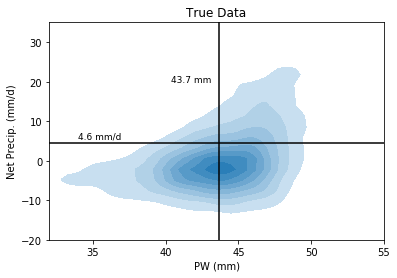

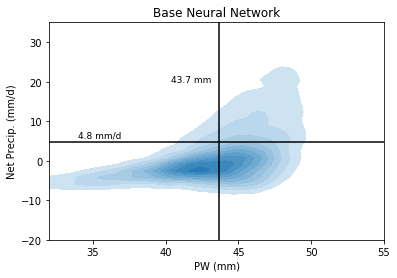

ValueError: X has 22 features per sample; expecting 15

In [5]:
%matplotlib inline
plot_df(get_ng(base_model_location=base_model_location, ds_location=ds_location), title='True Data')
plot_df(get_data(base_model, base_model_location=base_model_location, ds_location=ds_location), title='Base Neural Network')
plot_df(get_data(stochastic_model_column_integrated_q2_ratio_binning, base_model_location=base_model_location, ds_location=ds_location), title='Stochastic Model Column Integrated Q2 Binning')
plot_df(get_data(non_markov_model, base_model_location=base_model_location, ds_location=ds_location), title='Non Markov Stochastic Model')

Now simulate eta and regenerate the plots:

In [ ]:
base_model.simulate_eta(n_time_steps=50)
stochastic_model_precip_binning.simulate_eta(n_time_steps=50)
stochastic_model_column_integrated_q2_ratio_binning.simulate_eta(n_time_steps=50)

In [ ]:
plot_df(get_ng(base_model_location=base_model_location, ds_location=ds_location), title='True Data')
plot_df(get_data(base_model, base_model_location=base_model_location, ds_location=ds_location), title='Base Neural Network, Simulated Eta')
plot_df(get_data(stochastic_model_precip_binning, base_model_location=base_model_location, ds_location=ds_location), title='Stochastic Model Precip Binning, Simulated Eta')
plot_df(get_data(stochastic_model_column_integrated_q2_ratio_binning, base_model_location=base_model_location, ds_location=ds_location), title='Stochastic Model Column Integrated Q2 Binning, Simulated Eta')